In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [2]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [4]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 

        # Non-linearity
        self.sigmoid = nn.Sigmoid()

        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)

        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)

        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

In [5]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

In [6]:
criterion = nn.CrossEntropyLoss()

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2428 - accuracy: 0.9294 - val_loss: 0.1129 - val_accuracy: 0.9667
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1002 - accuracy: 0.9689 - val_loss: 0.1015 - val_accuracy: 0.9683
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0729 - accuracy: 0.9770 - val_loss: 0.1022 - val_accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0535 - accuracy: 0.9827 - val_loss: 0.0884 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.0798 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0354 - accuracy: 0.9882 - val_loss: 0.0852 - val_accuracy: 0.9750
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - l

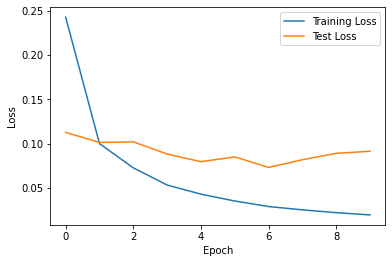

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch [1/10], Step [100/600], Loss: 0.3873
Epoch [1/10], Step [200/600], Loss: 0.2690
Epoch [1/10], Step [300/600], Loss: 0.1633
Epoch [1/10], Step [400/600], Loss: 0.2395
Epoch [1/10], Step [500/600], Loss: 0.1730
Epoch [1/10], Step [600/600], Loss: 0.0699
Epoch [2/10], Step [100/600], Loss: 0.1438
Epoch [2/10], Step [200/600], Loss: 0.1208
Epoch [2/10], Step [300/600], Loss: 0.0603
Epoch [2/10], Step [400/600], Loss: 0.1166
Epoch [2/10], Step [500/600], Loss: 0.0671
Epoch [2/10], Step [600/600], Loss: 0.1178
Epoch [3/10], Step [100/600], Loss: 0.0751
Epoch [3/10], Step [200/600], Loss: 0.0769
Epoch [3/10], Step [300/600], Loss: 0.0748
Epoch [3/10], Step [400/600], Loss: 0.1451
Epoch [3/10], Step [500/600], Loss: 0.1868
Epoch [3/10], Step [600/600], Loss: 0.1070
Epoch [4/10], Step [100/600], Loss: 0.0341
Epoch [4/10], Step [200/600], Loss: 0.1904
Epoch [4/10], Step [300/600], Loss: 0.0314
Epoch [4/10], Step [400/600], Loss: 0.0146
Epoch [4/10], Step [500/600], Loss: 0.0792
Epoch [4/10

Text(0.5, 0, 'Iteration')

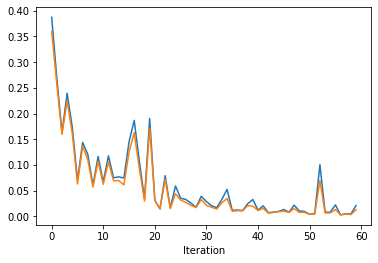

In [9]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784    # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# FNN model
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = FNN(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
train_loss = []
test_loss = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Save loss
        if (i+1) % 100 == 0:
            train_loss.append(loss.item())
            with torch.no_grad():
                test_loss.append(criterion(model(images), labels).item())

        # Print training progress
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy of the model on the 10000 test images: {100 * correct / total} %')

# Plot training and test loss
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Test loss')
plt.xlabel('Iteration')
